<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.911018,79.793362,49.260229,-0.000143,172.964466,172.964291,0.000175
1,0.0,1.0,55.581398,43.417196,89.556449,-0.000063,198.554981,198.554661,0.000320
2,0.0,2.0,92.546822,75.078299,27.458792,-0.000051,205.083863,205.084093,-0.000230
3,0.0,3.0,74.906881,95.996976,39.984227,-0.000088,220.887997,220.888507,-0.000510
4,0.0,4.0,60.655396,28.140943,53.300621,0.002407,152.099367,152.096093,0.003274
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,89.663290,66.132318,98.016881,-0.000269,263.812220,263.812852,-0.000631
29996,999.0,26.0,92.698145,98.155194,82.929590,-0.000095,283.782834,283.783260,-0.000426
29997,999.0,27.0,51.683446,26.798309,74.974380,0.001368,163.457503,163.456022,0.001481
29998,999.0,28.0,87.222433,60.232847,57.204725,-0.000356,214.659648,214.659881,-0.000233


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.911018,79.793362,49.260229,-0.000143,172.964466,172.964291,0.000175
1,0.0,1.0,55.581398,43.417196,89.556449,-0.000063,198.554981,198.554661,0.000320
2,0.0,2.0,92.546822,75.078299,27.458792,-0.000051,205.083863,205.084093,-0.000230
3,0.0,3.0,74.906881,95.996976,39.984227,-0.000088,220.887997,220.888507,-0.000510
4,0.0,4.0,60.655396,28.140943,53.300621,0.002407,152.099367,152.096093,0.003274
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,89.663290,66.132318,98.016881,-0.000269,263.812220,263.812852,-0.000631
29996,999.0,26.0,92.698145,98.155194,82.929590,-0.000095,283.782834,283.783260,-0.000426
29997,999.0,27.0,51.683446,26.798309,74.974380,0.001368,163.457503,163.456022,0.001481
29998,999.0,28.0,87.222433,60.232847,57.204725,-0.000356,214.659648,214.659881,-0.000233


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.911018  79.793362  49.260229  ...  172.964466  172.964291  0.000175
      1.0    55.581398  43.417196  89.556449  ...  198.554981  198.554661  0.000320
      2.0    92.546822  75.078299  27.458792  ...  205.083863  205.084093 -0.000230
      3.0    74.906881  95.996976  39.984227  ...  220.887997  220.888507 -0.000510
      4.0    60.655396  28.140943  53.300621  ...  152.099367  152.096093  0.003274
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   89.663290  66.132318  98.016881  ...  263.812220  263.812852 -0.000631
      26.0   92.698145  98.155194  82.929590  ...  283.782834  283.783260 -0.000426
      27.0   51.683446  26.798309  74.974380  ...  163.457503  163.456022  0.001481
      28.0   87.222433  60.232847  57.204725  ...  214.659648  214.659881 -0.000233
      29.0   80.586023  87.736327  51.790076  ...  230.112474  230.112348  0.000126

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.911018  79.793362  49.260229  ...  172.964466  172.964291  0.000175
      1.0    55.581398  43.417196  89.556449  ...  198.554981  198.554661  0.000320
      2.0    92.546822  75.078299  27.458792  ...  205.083863  205.084093 -0.000230
      3.0    74.906881  95.996976  39.984227  ...  220.887997  220.888507 -0.000510
      4.0    60.655396  28.140943  53.300621  ...  152.099367  152.096093  0.003274
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   89.663290  66.132318  98.016881  ...  263.812220  263.812852 -0.000631
      26.0   92.698145  98.155194  82.929590  ...  283.782834  283.783260 -0.000426
      27.0   51.683446  26.798309  74.974380  ...  163.457503  163.456022  0.001481
      28.0   87.222433  60.232847  57.204725  ...  214.659648  214.659881 -0.000233
      29.0   80.586023  87.736327  51.790076  ...  230.112474  230.112348  0.000126

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.911018,79.793362,49.260229,-0.000143,172.964466,172.964291,0.000175
1,0.0,1.0,55.581398,43.417196,89.556449,-0.000063,198.554981,198.554661,0.000320
2,0.0,2.0,92.546822,75.078299,27.458792,-0.000051,205.083863,205.084093,-0.000230
3,0.0,3.0,74.906881,95.996976,39.984227,-0.000088,220.887997,220.888507,-0.000510
4,0.0,4.0,60.655396,28.140943,53.300621,0.002407,152.099367,152.096093,0.003274
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,89.663290,66.132318,98.016881,-0.000269,263.812220,263.812852,-0.000631
29996,999.0,26.0,92.698145,98.155194,82.929590,-0.000095,283.782834,283.783260,-0.000426
29997,999.0,27.0,51.683446,26.798309,74.974380,0.001368,163.457503,163.456022,0.001481
29998,999.0,28.0,87.222433,60.232847,57.204725,-0.000356,214.659648,214.659881,-0.000233


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.911018  79.793362  49.260229  ...  172.964466  172.964291  0.000175
      1.0    55.581398  43.417196  89.556449  ...  198.554981  198.554661  0.000320
      2.0    92.546822  75.078299  27.458792  ...  205.083863  205.084093 -0.000230
      3.0    74.906881  95.996976  39.984227  ...  220.887997  220.888507 -0.000510
      4.0    60.655396  28.140943  53.300621  ...  152.099367  152.096093  0.003274
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   89.663290  66.132318  98.016881  ...  263.812220  263.812852 -0.000631
      26.0   92.698145  98.155194  82.929590  ...  283.782834  283.783260 -0.000426
      27.0   51.683446  26.798309  74.974380  ...  163.457503  163.456022  0.001481
      28.0   87.222433  60.232847  57.204725  ...  214.659648  214.659881 -0.000233
      29.0   80.586023  87.736327  51.790076  ...  230.112474  230.112348  0.000126

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

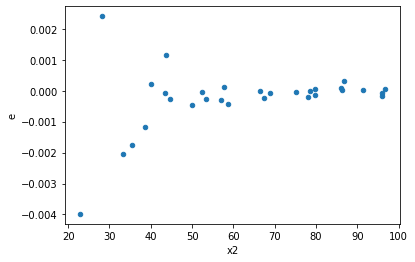

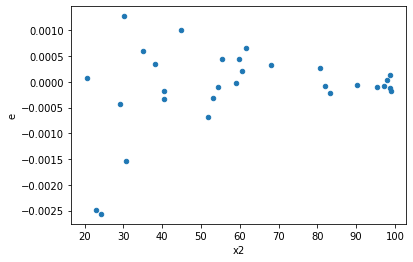

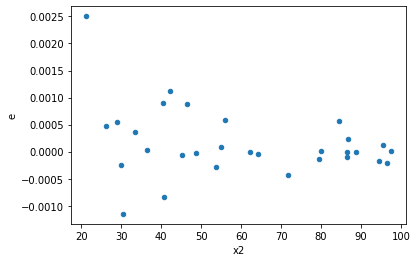

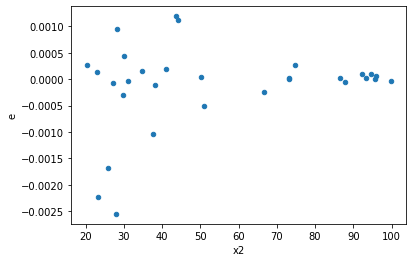

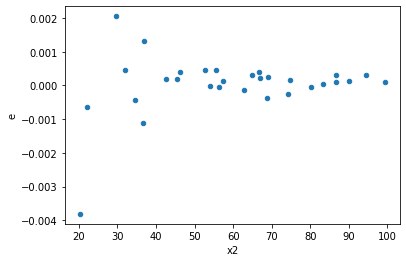

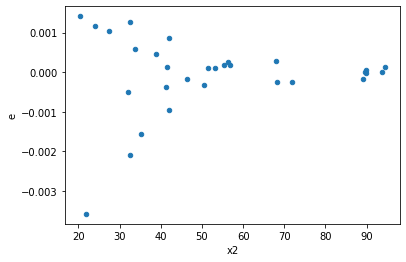

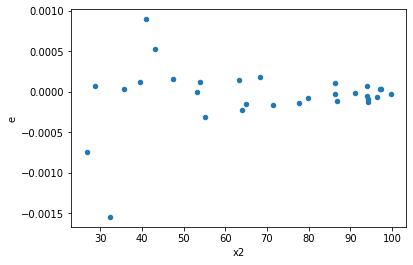

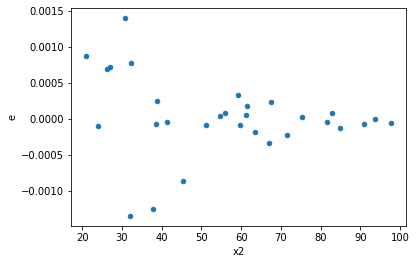

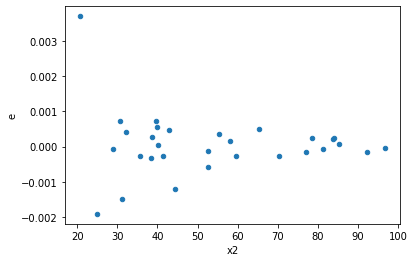

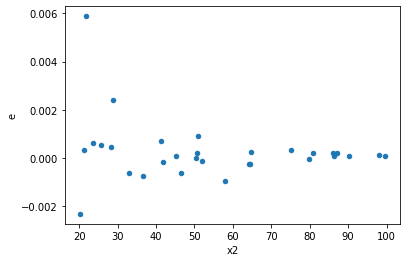

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,1.5236813102067356e-07,2.1611322496141357e-05,1.9046016377584195e-08,2.7014153120176697e-06,0.007050384401411736,2.6094375347963635e-08,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,2.3214353238442896e-07,1.2714237651627644e-05,2.901794154805362e-08,1.5892797064534555e-06,0.018258549096312554,1.741146573315548e-06,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,5.155583132281631e-07,8.522809062832059e-06,6.444478915352039e-08,1.0653511328540074e-06,0.06049159489874191,0.00028340173254825867,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,1.234179729955405e-07,9.785603573539934e-06,1.5427246624442564e-08,1.2232004466924917e-06,0.012612198324614346,3.432032156694616e-07,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,3.71505865988476e-07,1.6126411100419058e-05,4.64382332485595e-08,2.0158013875523823e-06,0.02303710749249237,4.7887322586001325e-06,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,2.6772341997372746e-07,2.0954029368863715e-05,3.346542749671593e-08,2.6192536711079643e-06,0.012776703480789547,3.633779864503404e-07,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,5.7865398254734905e-08,3.370603606270872e-06,7.233174781841863e-09,4.21325450783859e-07,0.017167666392772698,1.3300249941648155e-06,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,2.6022096701319804e-07,6.087070714990193e-06,3.2527620876649755e-08,7.608838393737742e-07,0.04274978543823558,6.724483357425825e-05,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,5.33418479080752e-07,1.557395533880816e-05,6.6677309885094e-08,1.94674441735102e-06,0.03425067476285528,2.6335471342843304e-05,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    984
Reject005=1 : Homoscedasticity       16
Name: Result_test, dtype: int64